# 📝 Exercise M5.02

The aim of this exercise is to find out whether a decision tree
model is able to extrapolate.

By extrapolation, we refer to values predicted by a model outside of the
range of feature values seen during the training.

We will first load the regression data.

In [1]:
import pandas as pd

penguins = pd.read_csv("../datasets/penguins_regression.csv")

feature_name = "Flipper Length (mm)"
target_name = "Body Mass (g)"
data_train, target_train = penguins[[feature_name]], penguins[target_name]

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">If you want a deeper overview regarding this dataset, you can refer to the
Appendix - Datasets description section at the end of this MOOC.</p>
</div>

First, create two models, a linear regression model and a decision tree
regression model, and fit them on the training data. Limit the depth at
3 levels for the decision tree.

In [2]:
# Write your code here.
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

model = LinearRegression()
model.fit(data_train, target_train)

tree = DecisionTreeRegressor(max_depth=3)
tree.fit(data_train, target_train)

DecisionTreeRegressor(max_depth=3)

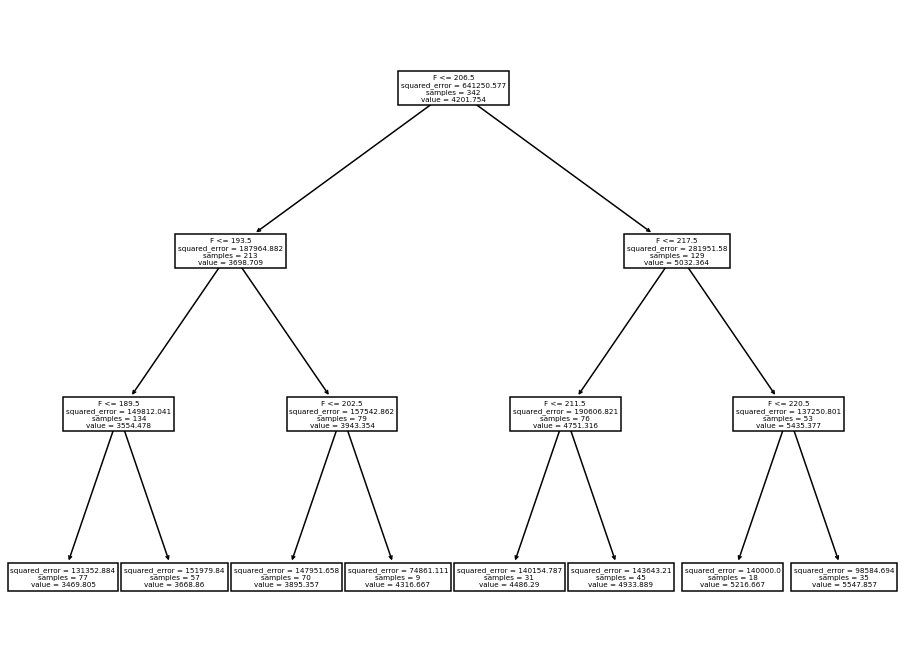

In [5]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

_, ax = plt.subplots(figsize=(16, 12))
_ = plot_tree(tree, feature_names=feature_name, ax=ax)

Create a synthetic dataset containing all possible flipper length from
the minimum to the maximum of the training dataset. Get the predictions of
each model using this dataset.

In [6]:
# Write your code here.
import numpy as np

data_test = pd.DataFrame(np.arange(data_train[feature_name].min(),
                                   data_train[feature_name].max()),
                                   columns=[feature_name])

In [7]:
linear_predicted = model.predict(data_test)
tree_predicted = tree.predict(data_test)

Create a scatter plot containing the training samples and superimpose the
predictions of both models on the top.

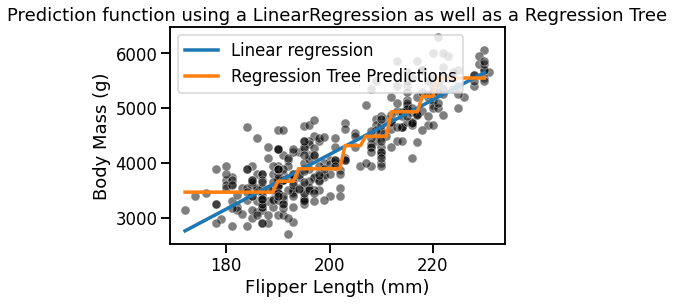

In [8]:
# Write your code here.
import seaborn as sns
sns.scatterplot(data=penguins, x=feature_name, y=target_name,
                color="black", alpha=0.5)
plt.plot(data_test[feature_name], linear_predicted, label="Linear regression")
plt.plot(data_test[feature_name], tree_predicted, label='Regression Tree Predictions', color="tab:orange")
plt.legend()
_ = plt.title("Prediction function using a LinearRegression as well as a Regression Tree")

Now, we will check the extrapolation capabilities of each model. Create a
dataset containing a broader range of values than your previous dataset,
in other words, add values below and above the minimum and the maximum of
the flipper length seen during training.

In [9]:
# Write your code here.
data_test_new = pd.DataFrame(np.arange((data_train[feature_name].min() - 40),
                                   (data_train[feature_name].max() + 40)),
                                   columns=[feature_name])

Finally, make predictions with both models on this new interval of data.
Repeat the plotting of the previous exercise.

In [10]:
# Write your code here.
linear_predicted_new = model.predict(data_test_new)
tree_predicted_new = tree.predict(data_test_new)

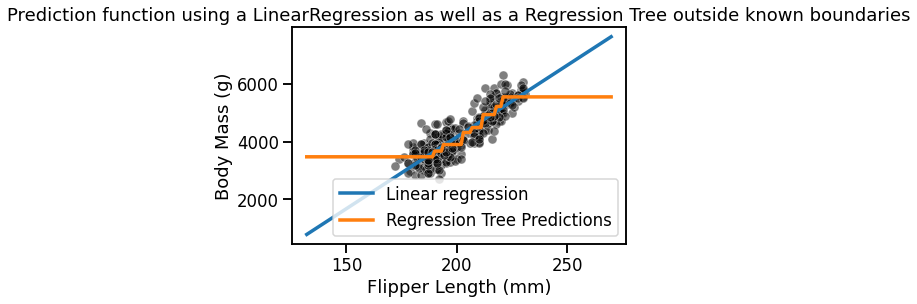

In [11]:
import seaborn as sns
sns.scatterplot(data=penguins, x=feature_name, y=target_name,
                color="black", alpha=0.5)
plt.plot(data_test_new[feature_name], linear_predicted_new, label="Linear regression")
plt.plot(data_test_new[feature_name], tree_predicted_new, label='Regression Tree Predictions', color="tab:orange")
plt.legend()
_ = plt.title("Prediction function using a LinearRegression as well as a Regression Tree outside known boundaries")